In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import io
import requests
import statsmodels.api as sm

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
passengers = content['#Passengers']

In [3]:
pd_content = content.copy()
pd_content['Month'] = pd.to_datetime(pd_content['Month'], infer_datetime_format=True)
pd_content.index = pd_content.Month

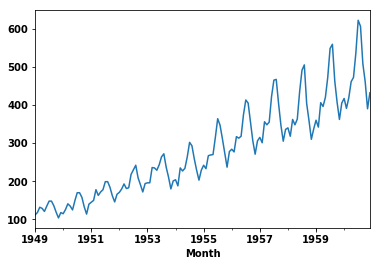

In [4]:
pd_content['#Passengers'].plot()

In [5]:
df_passenger = pd.DataFrame(content['#Passengers'].values.astype(int), 
                            pd.DatetimeIndex(start='1949-01',
                                             periods=len(content['#Passengers']), 
                                             freq='M'))

C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  after removing the cwd from sys.path.


# 加法モデル

In [6]:
ts = sm.tsa.seasonal_decompose(df_passenger.values, freq=12)

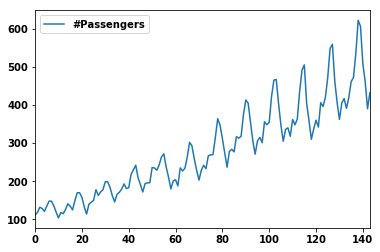

In [7]:
# 原系列
content.plot()

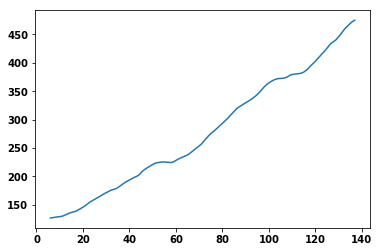

In [8]:
# トレンド
plt.plot(ts.trend)

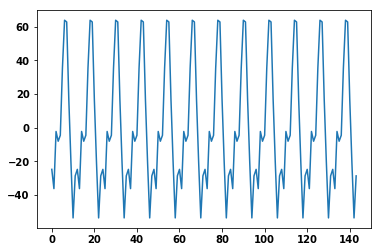

In [9]:
# 季節変動
plt.plot(ts.seasonal)

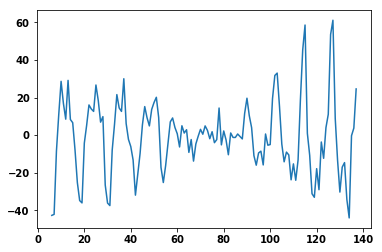

In [10]:
# 不規則変動
plt.plot(ts.resid)

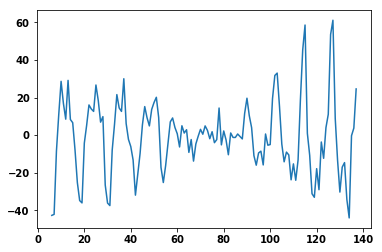

In [11]:
restoration = ts.trend + ts.seasonal
res = df_passenger.values.flatten()[6:-6] - restoration.flatten()[6:-6]

# 傾向変動+季節変動と観測データとの差分
plt.plot([np.float('nan')]*6 + res.tolist() + [np.float('nan')]*6)

# 乗法モデル

In [12]:
ts_mult = sm.tsa.seasonal_decompose(df_passenger.values, freq=12,  model='multiplicative')

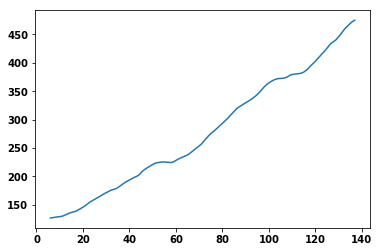

In [13]:
# トレンド
plt.plot(ts_mult.trend)

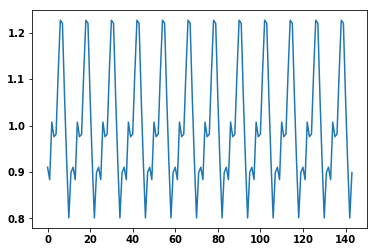

In [14]:
# 季節変動
plt.plot(ts_mult.seasonal)

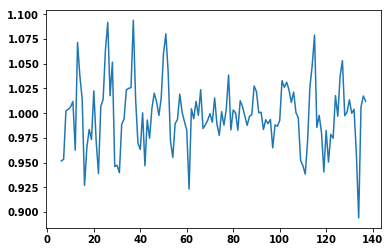

In [15]:
# 不規則変動（原系列/(トレンド*季節変動)）
plt.plot(ts_mult.resid)

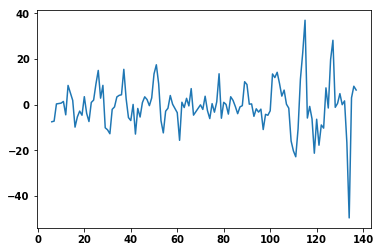

In [16]:
restoration_mult = ts_mult.trend * ts_mult.seasonal
res_mult = df_passenger.values.flatten()[6:-6] - restoration_mult.flatten()[6:-6]

# 傾向変動*季節変動と観測データとの差分
plt.plot([np.float('nan')]*6 + res_mult.tolist() + [np.float('nan')]*6)